In [15]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

In [16]:
%run ..//source//FED_functions.py

In [17]:

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


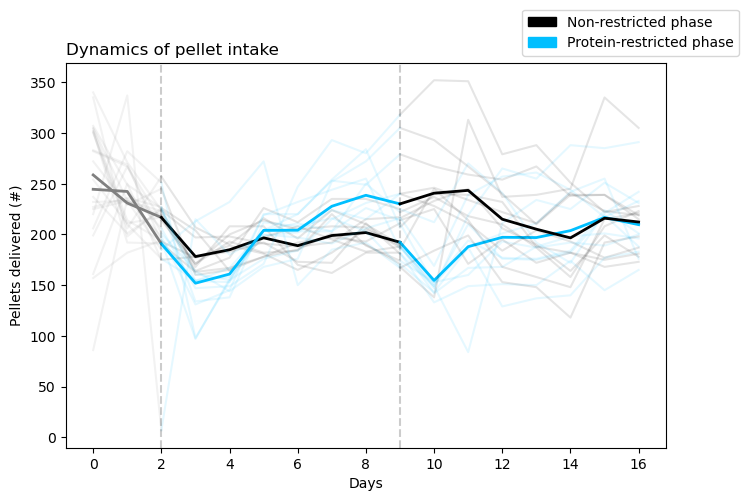

In [32]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Pellets delivered (#)",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
   



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)

fig_folder= r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2024\03_MAR_2024\food_for_thought_march14\figs\\"
f.savefig(fig_folder + "pellet_intake_timeline.png", dpi=300, bbox_inches="tight")



# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font> and <font color = "red" >filters values under 100 and above 300 for a more pronounced visualization </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


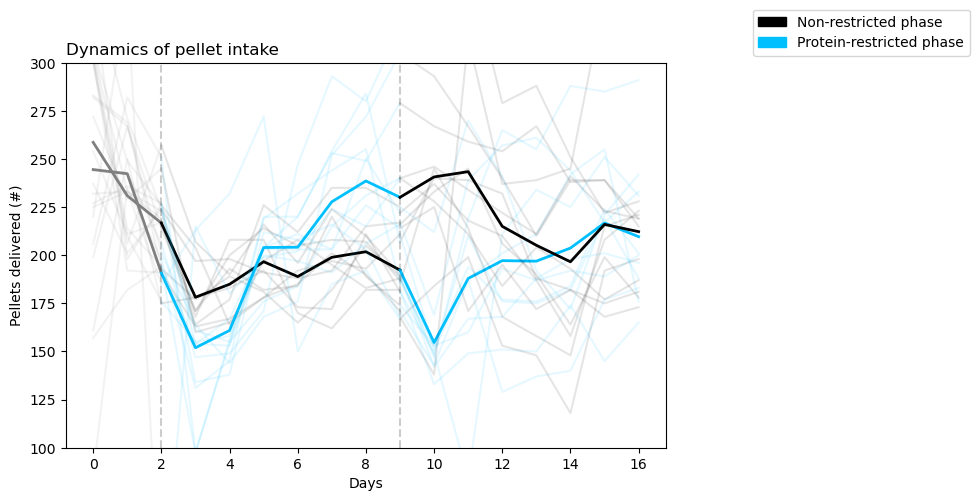

In [19]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Pellets delivered (#)",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
# Filter data below 100 and above 300 pellets
ax.set_ylim(bottom=100)
ax.set_ylim(top=300)   



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)


